## Preprocess data from data/twitter_poll.csv

In [5]:
import pandas as pd
import numpy as np

In [9]:
twitter_poll_df = pd.read_csv('data/twitter_poll.csv')

# handle retweets - always have a favorite count of 0, imputate missing data by replacing these with the average favorite count.
twitter_poll_df['favorite_count'].replace(0, np.nan, inplace=True)
average_fvt_cnt = twitter_poll_df['favorite_count'].mean()
twitter_poll_df['favorite_count'].replace(np.nan, average_fvt_cnt, inplace=True)
twitter_poll_df.head()

,modeldate,Unnamed: 0,text,retweet_count,favorite_count,approve_estimate,disapprove_estimate
0,4/23/2021,1,Heading back to Georgia with @DrBiden next Thu...,3704,47202.0,53.751111,39.913626
1,4/22/2021,2,"RT @WhiteHouse: Before taking office, Presiden...",2386,98787.2,53.266932,40.234692
2,4/22/2021,3,RT @POTUS: America is back. We rejoined the Pa...,18090,98787.2,53.266932,40.234692
3,4/21/2021,4,RT @POTUS: The guilty verdict does not bring b...,3814,98787.2,53.431994,40.051306
4,4/20/2021,5,"RT @POTUS: Today, a jury in Minnesota found fo...",8597,98787.2,53.455244,40.625908


In [11]:
twitter_poll_df.drop(['Unnamed: 0', 'text', 'disapprove_estimate', 'modeldate'], axis=1, inplace=True)
twitter_poll_df.head()

,retweet_count,favorite_count,approve_estimate
0,3704,47202.0,53.751111
1,2386,98787.2,53.266932
2,18090,98787.2,53.266932
3,3814,98787.2,53.431994
4,8597,98787.2,53.455244


## Get training and test set

In [13]:
from sklearn.model_selection import train_test_split

approve_estimate = twitter_poll_df['approve_estimate']
twitter_poll_df.drop('approve_estimate', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(twitter_poll_df, approve_estimate.values, test_size=0.2)

## Normalization
So at this point, favorites and retweets are the features, $X_{fvc}$ and $X_{rtc}$, that predict the approval estimate, $Y$. I want to normalize $X_{fvc}$ and $X_{rtc}$ since retweets are almost always less than favorites.

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.94902148 -0.02236819]
 [-0.75432501 -0.02236819]
 [ 1.51244849 -0.02236819]
 [-0.03245896 -0.02236819]
 [-0.8944675  -0.02236819]
 [-0.65537634 -3.04411119]
 [-0.77478275 -0.02236819]
 [ 0.31671434 -0.02236819]
 [-0.89530251 -0.02236819]
 [-0.45594814 -0.02236819]
 [ 2.08415193 -0.02236819]
 [-0.74054735 -0.02236819]
 [-0.50201285 -0.02236819]
 [ 0.86267163 -0.02236819]
 [-0.50145618 -0.02236819]
 [ 0.19341121 -0.02236819]
 [ 0.39005604 -0.02236819]
 [ 3.23437804 -0.02236819]
 [-0.98437023 -0.02236819]
 [-0.24983987 -0.02236819]
 [ 0.97845967 -0.02236819]
 [-0.7842462  -0.02236819]
 [-0.63992865 -0.02236819]
 [ 0.93991005  2.29769706]
 [-0.51008462 -0.02236819]
 [ 0.16223751 -0.02236819]
 [-1.10976088 -0.02236819]
 [ 0.386716   -0.02236819]
 [-0.14379361 -0.02236819]
 [ 0.28929818 -0.02236819]
 [ 1.85285419 -0.02236819]
 [-0.66637063 -0.02236819]
 [-0.82571835 -0.02236819]
 [-0.41934688 -0.02236819]
 [ 0.01555411 -0.02236819]
 [-0.71187867 -2.15037899]
 [ 0.29375157 -0.02236819]
 

## Now that all the data preprocessing is done, we can run regression models

Let's start with the simplest, linear regression

In [36]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
reg = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


## Visualization time !!

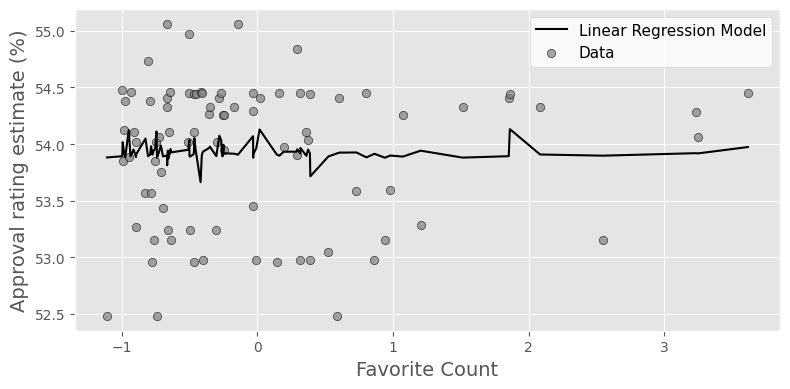

In [41]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

#print(X_train[:,0])

fig, ax = plt.subplots(figsize=(8, 4))
response = reg.predict(X_train)

xs = sorted(X_train[:,0])

ax.plot(xs, response, color='k', label='Linear Regression Model')
ax.scatter(xs, yz, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('Approval rating estimate (%)', fontsize=14)
ax.set_xlabel('Favorite Count', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()